<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/DolBaKi/4-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###확률적 경사하강법 SGDClassifier
 * SGDClassifier=Stochastic Gradient Descent

In [1]:
import pandas as pd

fish=pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target=fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target=train_test_split(fish_input,fish_target,random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [5]:
from sklearn.linear_model import SGDClassifier

In [6]:
sc=SGDClassifier(loss='log_loss',max_iter=10,random_state=42) # 로지스틱 손실함수
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled,train_target) # sgd에서 쓰는 핏함수라 보면 된다

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.85


###에포크와 과대/과소
 * 에포크는 학습횟수를 말함

In [ ]:
import numpy as np

sc=SGDClassifier(loss='log_loss',random_state=42) # 손실함수를 로지스틱 손실로

train_score=[]
test_score=[]

classes=np.unique(train_target)

 * 로지스틱 손실함수는 낮을 수록 리스크가 적음
 * 반대로 높를 수록 리스크가 크다
 * 로지스틱 손실함수=이진 크로스엔트로피 손실함수

In [ ]:
for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes) # 에포크 300번
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

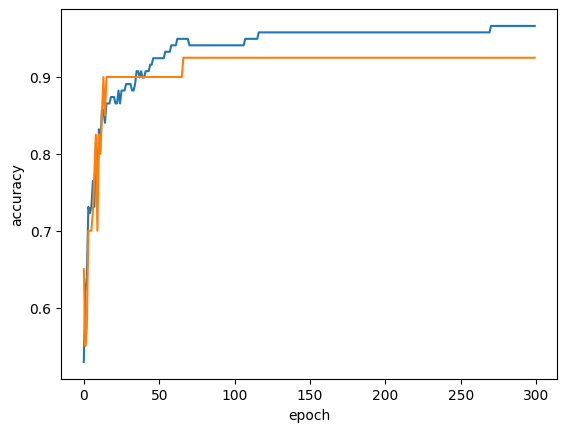

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch') # 에포크
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc=SGDClassifier(loss='log_loss',max_iter=100,tol=None,random_state=42) # log_loss는 로지스틱 손실
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


In [ ]:
sc = SGDClassifier(loss='hinge',max_iter=100,tol=None,random_state=42) # hinge는 이름대로 힌지 손실
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9495798319327731
0.925
